## <center>Classificação de Mutações Genéticas Clinicamente Acionáveis</center>

## Medicina Personalizada - Redefinindo o  Tratamento de Câncer

>>> Predict the effect of Genetic Variants to enable Personalized Medicine

### Definição problema

**Embora o papel dos testes genéticos no avanço de nossa compreensão do câncer e no desenvolvimento de tratamentos mais precisos e eficazes seja muito promissor, o progresso tem sido lento devido à quantidade significativa de trabalho manual ainda necessário para entender a genômica.**

Eventualmente, muito tem sido dito durante os últimos anos sobre como a medicina de  precisão e, mais concretamente, como o teste genético, vai provocar disrupção no tratamento de doenças como o câncer.Mas isso ainda está acontecendo apenas parcialmente devido à enorme  quantidade de trabalho manual ainda necessário. **Neste projeto, tentaremos levar a medicina personalizada ao seu potencial máximo.**


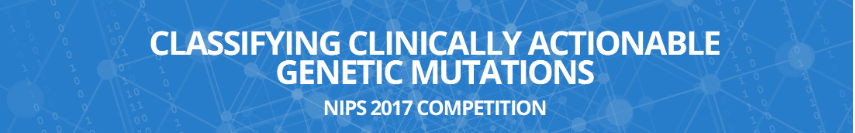
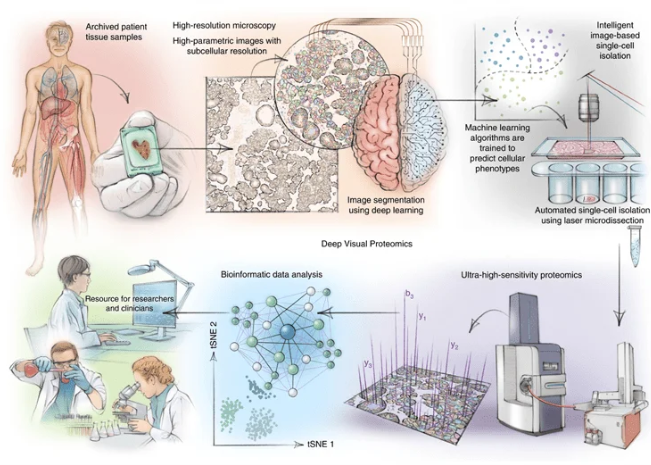

Source: https://www.news-medical.net/news/20220522/Deep-visual-proteomics-is-redefining-cancer-diagnostics.aspxhttps


Uma vez sequenciado, um tumor cancerígeno pode ter milhares de  mutações genéticas. **O desafio é distinguir as mutações que contribuem para o  crescimento do tumor das mutações.Atualmente, esta interpretação de mutações genéticas está sendo feita  manualmente. Esta é uma tarefa muito demorada, onde um patologista clínico tem  que revisar manualmente e classificar cada mutação genética com base em  evidências da literatura clínica baseada em texto.**

Portanto, para este projeto (competição), o MSKCC <a href="https://www.mskcc.org/">(Memorial Sloan Kettering Cancer Center) </a> está  disponibilizando uma base de conhecimento anotada por especialistas, onde **pesquisadores e oncologistas de nível mundial anotaram manualmente milhares  de mutações. O dataset completo pode ser encontrado em:**

https://www.kaggle.com/c/msk-redefining-cancer-treatment/data

NIPS 2017 Competition Track https://nips.cc/Conferences/2017/CompetitionTrack

---

**Organizadores**

- Iker Huerga, huergasi@mskcc.org

- Alexander Grigorenko, grigorea@mskcc.org

- Anasuya Das, dasa@mskcc.org Leifur

- Thorbergsson, thorberl@mskcc.org

**Coordenadores da competição**

- Kyla Nemitx, nemitzk@mskcc.org

- Randi Kaplan, kaplanr@mskcc.org

- Jenna Sandker, muchaj@mskcc.org 



---

### Objetivo 

---
Objetivo é  desenvolver **um modelo (algoritmo) de classificação que analisem resumos de artigos médicos** e, <mark>com base em seu conteúdo, determinem com precisão a oncogenicidade (4 classes) e o efeito de mutação (9 classes) dos genes neles discutidos</mark>.O algoritmo precisa classificar as mutações genéticas com base em evidências clínicas baseada em artigos (textos científicos médicos).Ou seja, o resultado alcançado do <mark>modelo ajudará os especialistas a acelerar significativamente suas pesquisas.</mark>

---

### File descriptions

Ambos os files, treinamento e teste, os conjuntos de dados são fornecidos por meio de dois arquivos diferentes. Um **(training/test_variants)** fornece as informações sobre as mutações genéticas, enquanto o outro **(training/test_text)** fornece a evidência clínica (texto) que nossos especialistas humanos usaram para classificar as mutações genéticas. Ambos são vinculados por meio do campo ID.

--- 

**training_variants**

É Um arquivo **separado por vírgulas** contendo a descrição das mutações genéticas usadas para treinamento, os atribuitos são: 

+ **Os campos são ID**: o id da linha usada para vincular a mutação à evidência clínica.
+ **Gene**: o gene onde essa mutação genética está localizada.
+ **Variation**: a alteração de aminoácidos para essas mutações.
+ **Class**: 1 - 9 a classe desta mutação genética foi classificada.

**test_variants**

É um arquivo separado por vírgulas contendo a descrição das mutações genéticas usadas para treinamento. 

+ **Os campos são ID**: o id da linha usada para vincular a mutação à evidência clínica.
+ **Gene**: o gene onde essa mutação genética está localizada.
+ **Variation**: a alteração de aminoácidos para essas mutações.

--- 

**training_text**

É um arquivo delimitado por **barra dupla (||)** que contém a evidência clínica (texto) usada para classificar mutações genéticas. 

+ Os campos são ID (o id da linha usada para vincular a evidência clínica à mutação genética).

+ Texto (a evidência clínica usada para classificar a mutação genética).


**test_text**

É um arquivo com delimitado definido polr barra dupla (||) que contém a evidência clínica (texto) usada para classificar mutações genéticas. 

+ Os campos são ID (o id da linha usada para vincular a evidência clínica à mutação genética)
+ Texto (a evidência clínica usada para classificar a mutação genética)

--- 

**submitSample**

- É arquivo de envio de amostra no formato correto

### <center> Métricas e Resultados Alcançados</center>

###  Modelo implementado com a Biblioteca Keras - Memória GRU


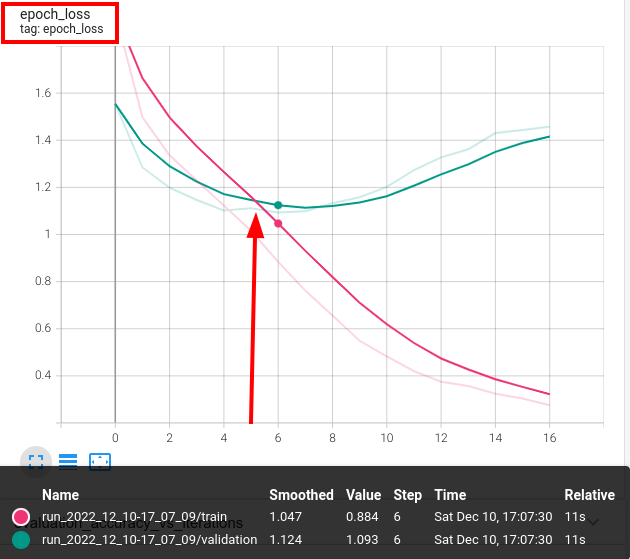

---

De acordo com gráfico, o modelo usando célula GRU atingiu a menor perda em apenas 5 épocas, abaixo de ~ 1.2. Em seguida as figuras ilustra as métricas do modelo em dados de teste.

--- 
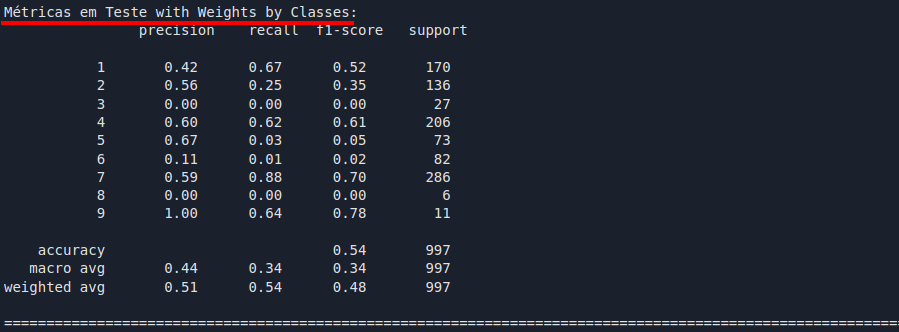
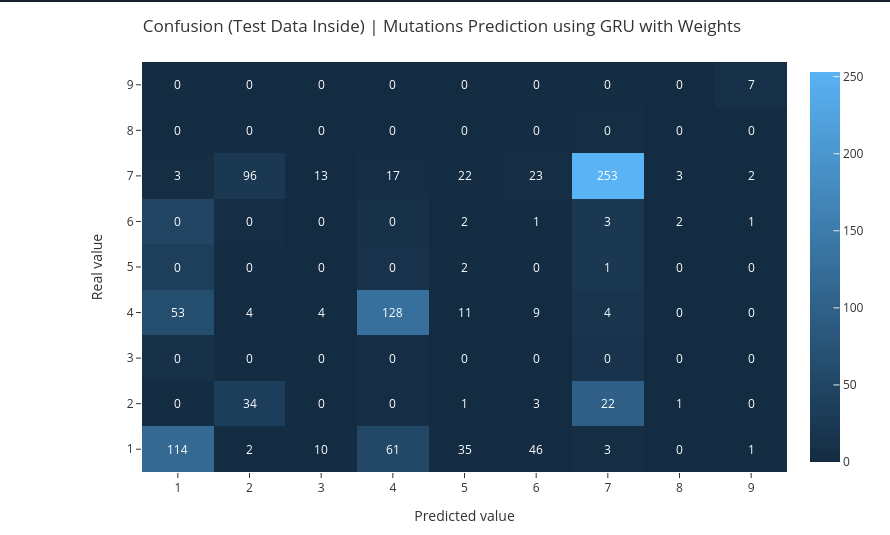

---

Assim, a partir desse momento, entraremos em detalhes técnicos à medida que o projeto desenvolveu suas técnicas analíticas e os resultados alcançados.

### Instalando e Carregando os Pacotes e Bibliotecas

In [1]:
# Importando biliotecas necessárias para Manipulação dos Sistema Operacional e Python
import os,sys,psutil, platform
from platform import python_version

# Importando bibliotecas necessárias para a plotagem matplotlib e Seaborn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

# Importando bibliotecas necessárias para a plotagem de gráficos interativos com o plotly.
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode

#renderização dos gráficos no jupyterlab
import plotly.io as pio
pio.renderers.default = 'iframe'
pio.renderers.default = 'iframe_connected'
pio.renderers.default = 'colab'
pio.renderers.default = "png"

# Importando biblioteca para a manipulação e exploração dos conjuntos de dados.
import numpy as np
import pandas as pd 
from pandas_profiling import ProfileReport

# Importando módulos embutidos, collections
from collections import Counter

# Import módulos para cálculos matemáticos
import math

# Importando bibliotecas necessárias para manipulação tempo
import timeit
from time import time
from datetime import datetime


# Importando biblioteca para avaliação da performance do modelo e divisão 
from sklearn.model_selection import (
    cross_val_score, 
    train_test_split,
    KFold, StratifiedKFold
)

# Importando bibliotecas necessárias para balancear o conjunto de dados.
from imblearn.over_sampling import (
    ADASYN, BorderlineSMOTE,SMOTE
)

# Importando classes, para calcular as métricas de avaliação dos modelos preditivos.
from yellowbrick.classifier import (
    ClassBalance,
    ClassificationReport,
    ClassPredictionError,
    confusion_matrix,
    DiscriminationThreshold,
    PrecisionRecallCurve,
    ROCAUC
)

from sklearn.metrics import(
    auc,accuracy_score,
    classification_report,
    confusion_matrix,
    recall_score,precision_score,f1_score,
    roc_auc_score,
    roc_curve,
)
# Para ocultar Future Warnings.
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# A configuração de quantas linhas  e colunas que serão  mostradas
from IPython.display import display
#pd.options.display.max_rows =None

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth',False)# para check todo o conteúdo inteiro da coluna

In [2]:
# Versões dos pacotes usados neste jupyter notebook

# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark
print('*'*65)

%reload_ext watermark
%watermark -a "Helber l Figueredo" --iversions

# Versão da Linguagem Python
print('\nPython Language Version Used In This Jupyter Notebook:', python_version())

date =datetime.today().strftime('Date %d/%m/%Y')
print(f"Projeto Compilado em {date}")

*****************************************************************
Author: Helber l Figueredo

platform  : 1.0.8
pandas    : 1.3.4
sys       : 3.9.7 (default, Sep 16 2021, 13:09:58) 
[GCC 7.5.0]
psutil    : 5.8.0
matplotlib: 3.1.1
seaborn   : 0.11.2
plotly    : 5.6.0
numpy     : 1.21.6


Python Language Version Used In This Jupyter Notebook: 3.9.7
Projeto Compilado em Date 10/12/2022


### Hardware and system information
<mark><a href ="https://www.thepythoncode.com/article/get-hardware-system-information-python">code</a></mark>

In [3]:
def get_size(bytes, suffix="B"):
    """
    Scale bytes to its proper format
    e.g:
        1253656 => '1.20MB'
        1253656678 => '1.17GB'
    """
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
        
# System Information
print("="*40, "System Information", "="*40)
uname = platform.uname()
print(f"System: {uname.system}")
print(f"Release: {uname.release}")
print(f"Version: {uname.version}")
print(f"Machine: {uname.machine}")

# let's print CPU information
print("="*40, "CPU Info", "="*40)
# number of cores
print("Physical cores:", psutil.cpu_count(logical=False))
print("Total cores:", psutil.cpu_count(logical=True))
# CPU frequencies
cpufreq = psutil.cpu_freq()

print(f"Max Frequency: {cpufreq.max:.2f}Mhz")
print(f"Min Frequency: {cpufreq.min:.2f}Mhz")

# Memory Information
print("="*40, "Memory Information", "="*40)

# get the memory details
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}")


======================================== System Information ========================================
System: Linux
Release: 5.15.0-56-generic
Version: #62~20.04.1-Ubuntu SMP Tue Nov 22 21:24:20 UTC 2022
Machine: x86_64
======================================== CPU Info ========================================
Physical cores: 6
Total cores: 12
Max Frequency: 4800.00Mhz
Min Frequency: 800.00Mhz
======================================== Memory Information ========================================
Total: 31.19GB


### Exploratory Data Analysis

### Leitura dados de Train/test

In [4]:
# Loading the data train with pandas

# Marca o início
start = datetime.now()

#dados do tipo csv
train = pd.read_csv('data_files/train.csv')
test = pd.read_csv('data_files/test.csv')
print("Data loading time: ",datetime.now() - start)

Data loading time:  0:00:00.011516


In [5]:
# Conferindo as dimensões do conjunto de dados de train 
print('Number of data points:', train.shape[0])
print('Number of features:',    train.shape[1])
# checando se há valores missing em único valor booleano and  o número de registros duplicados.
print(f'Values missing: {train.isna().any().any()}\nValues duplicated: {train.duplicated().sum()}')
print('Features:', train.columns.values)
train.head()

Number of data points: 3321
Number of features: 5
Values missing: False
Values duplicated: 0
Features: ['id' 'gene' 'variation' 'class' 'new_text']


,id,gene,variation,class,new_text
0,0,FAM58A,Truncating Mutations,1,fam58a truncating mutations
1,1,CBL,W802*,2,cbl w802
2,2,CBL,Q249E,2,cbl q249e
3,3,CBL,N454D,3,cbl n454d
4,4,CBL,L399V,4,cbl l399v


In [6]:
# Conferindo as dimensões do conjunto de dados de test
print('Number of data rows:', test.shape[0])
print('Number of features:', test.shape[1])
# checando se há valores missing em único valor booleano and  o número de registros duplicados.
print(f'Values missing: {test.isna().any().any()}\nValues duplicated: {test.duplicated().sum()}')
print('Features:', test.columns.values)
test.head()

Number of data rows: 5668
Number of features: 4
Values missing: False
Values duplicated: 0
Features: ['id' 'gene' 'variation' 'new_text']


,id,gene,variation,new_text
0,0,ACSL4,R570S,acsl4 r570s
1,1,NAGLU,P521L,naglu p521l
2,2,PAH,L333F,pah l333f
3,3,ING1,A148D,ing1 a148d
4,4,TMEM216,G77A,tmem216 g77a


### Text preprocessing

In [7]:
# Importando módulos para pré-processamento de texto
import re
import spacy
import string
import nltk

#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


# Importando biblotecas TensorFlow e Keras
import tensorflow as tf
import tensorflow.keras as keras
import keras.backend as K
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, LSTM, GRU
from tensorflow.python.keras.utils import  losses_utils

# A kerasTuner HyperModel
import keras_tuner as kt

# Importando a barra de progresso método de visualização do resultados
from tqdm.keras import TqdmCallback

#TensorFlow e a keras  versões:
print('TensorFlow version:',tf.__version__)
print('Keras version:', keras.__version__)

2022-12-10 15:05:53.295767: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-10 15:05:53.295784: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-10 15:05:53.295798: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (rogstrixb460g): /proc/driver/nvidia/version does not exist


TensorFlow version: 2.8.0
Keras version: 2.8.0


## <center>Predictive modeling<center>

#### Declarando vetor de recursos e a variável de destino

In [8]:
train_text, train_labels = train['new_text'],train['class'].ravel()
# Check the shape of whole dataset and the splited training and test set
print("--Shape of the whole data--\n {}".format(train_text.shape))
print("\n--Shape of the target vector--\n {}".format(train_labels.shape))

--Shape of the whole data--
 (3321,)

--Shape of the target vector--
 (3321,)


### Train/Validadtion/Test  Split

In [9]:
#semente do gerador de números aleatórios
seed = 42

# Separaremos 20% dos dados para testes
test_size = 0.30

# Separaremos 10% dos dados para validação
val_split = 0.15

# divisão dos dados train/test  
X_train, X_test, y_train, y_test =train_test_split(train_text,train_labels,random_state=seed,
                                                   test_size=test_size, shuffle=True,stratify=train_labels) 

# shape
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(2324,) (997,) (2324,) (997,)


### Processamento de sequências usando RNNs

### Classe de Tokenizador Keras

A sintaxe   a seguir mostra a função Keras “Tokenizer”, juntamente com todos os parâmetros que são usados na função para diversos fins.


In [10]:
?tf.keras.preprocessing.text.Tokenizer

Init signature:
tf.keras.preprocessing.text.Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token=None,
    document_count=0,
    **kwargs,
)
Docstring:     
Text tokenization utility class.

This class allows to vectorize a text corpus, by turning each
text into either a sequence of integers (each integer being the index
of a token in a dictionary) or into a vector where the coefficient
for each token could be binary, based on word count, based on tf-idf...

# Arguments
    num_words: the maximum number of words to keep, based
        on word frequency. Only the most common `num_words-1` words will
        be kept.
    filters: a string where each element is a character that will be
        filtered from the texts. The default is all punctuation, plus
        tabs and line breaks, minus the `'` character.
    lower: boolean. Whether to convert the texts to lowercase.
    split: str. Separat

### Tokenization  texts_to_sequences

Precisamos converter os dados de texto em representação numérica, para que o modelo os entenda.De acordo, os conceitos citados anteriormente usaremos para modelagem preditiva  text_to_sequences

### Sequência e preenchimento

Em primeira instância, vamos representar cada frase por sequências de números usando text_to_sequences do objeto Tokenizer. Depois disso, nós preenchemos a sequência para que possamos ter o mesmo comprimento de cada sequência.

- num_words : quantas palavras únicas que queremos carregar nos dados de treinamento e teste. Em outras palavras, número máximo de palavras a serem usadas. (mais frequente)

- oov_token : token fora do vocabulário será adicionado ao índice de palavras no corpus que é usado para construir o modelo. Isso é usado para substituir palavras fora do vocabulário (palavras que não estão em nosso corpus) durante chamadas text_to_sequence.

- padding : 'pre' ou 'post (predefinição). Ao usar pre, vamos preencher antes de cada sequência e post vai preencher após cada sequência.

- maxlen : comprimento máximo de todas as sequências. Se não for fornecido, por padrão, usará o comprimento máximo da frase mais longa. Em outras palavras é comprimento máximo de palavras será usado para cada pedaço de texto ou para prever um rótulo.

- truncando: 'pre' ou 'post' (padrão 'pre'). Se um comprimento de sequência for maior que o valor maxlen fornecido, esses valores serão truncados para maxlen. A opção 'pre' será truncada no início, enquanto a opção 'post' será truncada no final das sequências

#### Definindo parâmetros de pré-processamento 

In [11]:
vocab_size = 3320 # Tamanho máximo do vocabulário
oov_token = "[UNK]" # out of vocabulary token
embed_dim = 10 # camada embedding 10 vetores de comprimento para representar cada palavra.
max_seq_len = 6 # Número máximo de palavras em cada sequences

In [12]:
# Criando uma instância da classe Tokenizer
tokenizer = keras.preprocessing.text.Tokenizer(oov_token = oov_token, 
                                               num_words=vocab_size,
                                               char_level=False,
                                               lower=True,
                                               )

# ajuste os dados, ou seja, aplica tokenizador ajustando um tokenizer ao texto
tokenizer.fit_on_texts(X_train.values)
tokenizer.fit_on_texts(X_test.values)

# conversão de tokens de corpus de texto em uma sequência de inteiros 
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Truncando e preenchendo as sequências de entrada para que todas tenham o mesmo comprimento para modelagem.
padded_train = pad_sequences(sequences_train, padding = 'post', maxlen=max_seq_len)
padded_test = pad_sequences(sequences_test, padding = 'post', maxlen=max_seq_len)

print('Shape of training, validation and testing tensor: ', padded_train.shape, padded_test.shape)

Shape of training, validation and testing tensor:  (2324, 6) (997, 6)


In [13]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 3321 unique tokens.


In [14]:
max_id = len(tokenizer.word_index)+1
max_id

3322

### Definindo a arquitetura do modelo usando célula Gated Recurrent Unit (GRU)

### Células GRU

De acordo (Géron, 2021), afirma que a célula Gated Recurrent Unit (GRU) foi proposta por Kyunghyun Cho et al. em um artigo de 2014  “Learning Phrase Representations Using RNN Encoder-Decoder for
Statistical Machine Translation” que também inaugurou a rede codificador-decodificador 


A célula GRU é uma versão simplificada da célula LSTM e aparentemente funciona muito bem (o que explica sua crescente popularidade). É um tipo de rede neural recorrente. É semelhante a um LSTM, mas possui apenas dois portões  um portão de reinicialização e um portão de atualização e, notavelmente, não possui um portão de saída. Menos parâmetros significa que as GRUs são geralmente mais fáceis/rápidas de treinar do que suas contrapartes LSTM.

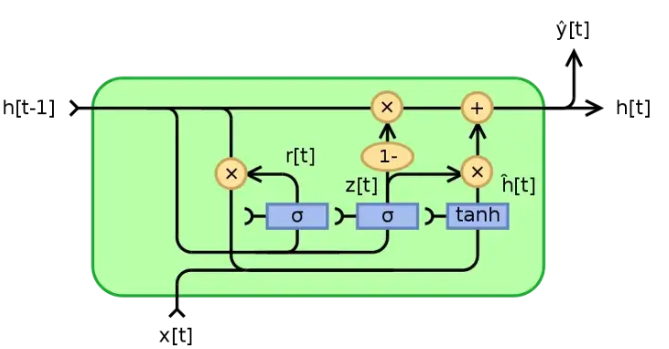

Source Image: (Nuzulul Khairu Nissa , 2021 )


Segundo (Géron, 2021), ressalta que as células LSTM e GRU são um dos principais motivos para o sucesso das
RNNs. Contudo, apesar de conseguirem lidar com sequências bem mais
longas do que as simples RNNs, **elas ainda têm uma memória de curto
prazo bastante limitada e têm dificuldades em aprender padrões de longo
prazo em sequências de 100 intervalos de tempo ou mais, como amostras de
áudio, séries temporais ou frases longas.**


_Leitural adicional_

Kyunghyun Cho et al., “Learning Phrase Representations Using RNN Encoder-Decoder for
Statistical Machine Translation”, Anais da Conferência de 2014 sobre Métodos Empíricos em
Processamento de Linguagem Natural (2014): 1724–1734.

https://medium.com/mlearning-ai/the-classification-of-text-messages-using-lstm-bi-lstm-and-gru-f79b207f90ad


**Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow. 2°ed** 


---

### Análise de classes desbalanceadas

#### Como definir o peso da classe para o conjunto  dados de desbalanceados no Keras?

Em uma tarefa de classificação, às vezes uma situação em que alguma classe não é distribuída igualmente. O que você faz neste caso? Como lidar com o desequilíbrio de classe? Existem várias técnicas que você pode usar para superar os desequilíbrios de classe. Um deles é definir o peso da classe . Neste tutorial, discutimos como definir o peso da classe para uma classe individual. Dá peso à classe minoritária proporcional à sua sub-representação.


Note-que (Géron, 2021), destaca-se que se o conjunto de treinamento estiver muito assimétrico, com algumas classes sendo representadas em excesso e outras sendo representadas de menos, seria útil definir o argumento **class_weight** ao chamar o método fit(), que daria um peso maior às classes menos representadas e um peso menor às classes representadas em excesso. Esses pesos seriam utilizados pelo Keras ao calcular a perda. Se precisar dos pesos por instância, defina o argumento **sample_weight (ele substitui a class_weight)**. Os pesos por instância podem ser vantajosos se algumas instâncias forem rotuladas por especialistas, enquanto outras forem rotuladas usando uma plataforma de crowdsourcing: você pode dar mais peso à anterior. Você também pode fornecer pesos de amostra (mas não pesos de classe) para o conjunto devalidação, adicionando-os como um terceiro item na tupla validation_data.


- class_weight: índices de classe de mapeamento de dicionário opcional (inteiros) para um valor de peso (float), usado para ponderar a função de perda (somente durante o treinamento). Isso pode ser útil para dizer ao modelo para "prestar mais atenção" às amostras de uma classe sub-representada .

- sample_weight: array Numpy opcional de pesos para as amostras de treinamento, usado para ponderar a função de perda (somente durante o treinamento). Você pode passar um array Numpy plano (1D) com o mesmo comprimento que as amostras de entrada (mapeamento 1:1 entre pesos e amostras) , ou no caso de dados temporais


https://androidkt.com/set-class-weight-for-imbalance-dataset-in-keras/

https://datascience-stackexchange-com.translate.goog/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras?_x_tr_sl=en&_x_tr_tl=pt&_x_tr_hl=pt-BR&_x_tr_pto=wapp

https://stackoverflow-com.translate.goog/questions/48173168/use-both-sample-weight-and-class-weight-simultaneously/48174220?_x_tr_sl=en&_x_tr_tl=pt&_x_tr_hl=pt-BR&_x_tr_pto=wapp#48174220

https://github-com.translate.goog/keras-team/keras/issues/2115?_x_tr_sl=en&_x_tr_tl=pt&_x_tr_hl=pt-BR&_x_tr_pto=wapp

---

In [15]:
# conte valores únicos por classe
uq = np.unique(train_labels, return_counts=True)
labels_dict = dict(zip(uq[0], uq[1]))
print(labels_dict)

{1: 568, 2: 452, 3: 89, 4: 686, 5: 242, 6: 275, 7: 953, 8: 19, 9: 37}


In [16]:
def get_class_weight(labels_dict):
    """Calcular os pesos de diferentes classes"""

    total = sum(labels_dict.values())
    max_num = max(labels_dict.values())
    mu = 1.0 / (total / max_num)
    class_weight = dict() 
    for key, value in labels_dict.items():
        score = math.log(mu * total / float(value))
        class_weight[key] = score if score > 1.0 else 1.0
    return class_weight

In [17]:
# chamada da function
class_weights = get_class_weight(labels_dict) 
print(class_weights)

{1: 1.0, 2: 1.0, 3: 2.370978533922062, 4: 1.0, 5: 1.370677177497516, 6: 1.242843805987631, 7: 1.0, 8: 3.9151759244877615, 9: 3.248696991009978}


**Assim como, temos 9 classes disponíveis, função de loss sparse_categorical_crossentropy espera um dict com 10 posições, começando no índice 0 para preenchimento.**

In [18]:
# reajustando index
weights= {0:0,1: 1.0, 2: 1.0, 3: 2.370978533922062, 4: 1.0, 5: 1.370677177497516, 6: 1.242843805987631, 7: 1.0, 8: 3.9151759244877615, 9: 3.248696991009978}

### Hyperparameter Optimization

Em seguida, vamos escrever uma função de construção do modelo reutilizável que usaremos em todos os nossos experimentos nesta seção.

In [21]:
def build_model_weight(hp):
    model = Sequential()
    
    hp_vector_size = hp.Int('vector_size', min_value= 6, max_value = 12,step = 2)
    
    model.add(
               Embedding(input_dim= max_id,
               output_dim= embed_dim,
               input_length=max_seq_len,
               mask_zero=True)
    )

    hp_spatialDropout1D = hp.Float('spatialDropout1D', min_value=0.1, max_value=0.5, step=0.1)
    model.add(Dropout(hp_spatialDropout1D))
    hp_dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    model.add(Dropout(hp_dropout_rate))
    
    hp_gru_unist1 = hp.Int('gru_units1',min_value=6, max_value=8,step=2)
    model.add(GRU(hp_gru_unist1,return_sequences=True))
    hp_gru_unist2 = hp.Int('gru_units2',min_value=4, max_value=6,step=2)
    model.add(GRU(hp_gru_unist2))


    model.add(Dense(10,activation='softmax'))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3,1e-6])
    hp_optimizer = hp.Choice(name="optimizer", values=["adam","nadam"])
    
    model.compile(
        optimizer= hp_optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    
    return model

tuner = kt.BayesianOptimization(
    build_model_weight,
    objective=kt.Objective("val_accuracy", direction="max"),
    max_trials=30,
    executions_per_trial=2,
    directory="research_tuner/mutations_gru_weight",
    overwrite = True,
)

In [22]:
# Exibir uma visão geral do espaço de pesquisa via search_space_summary ()
tuner.search_space_summary()

Search space summary
Default search space size: 7
vector_size (Int)
{'default': None, 'conditions': [], 'min_value': 6, 'max_value': 12, 'step': 2, 'sampling': None}
spatialDropout1D (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
gru_units1 (Int)
{'default': None, 'conditions': [], 'min_value': 6, 'max_value': 8, 'step': 2, 'sampling': None}
gru_units2 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 6, 'step': 2, 'sampling': None}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 1e-06], 'ordered': True}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'nadam'], 'ordered': False}


---

**Iniciando a pesquisa para busca os hiperparâmetros ideais.Treinamento com espaço de pesquisa  com o argumento class_weight**

In [23]:
keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=10),
]

tuner.search(
            padded_train, y_train,
            class_weight=weights,# passando os pesos
            batch_size=4,
            epochs=100,
            validation_split=val_split,
            callbacks=callbacks,
            #verbose = 1
)
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 30 Complete [00h 01m 22s]
val_accuracy: 0.5558739304542542

Best val_accuracy So Far: 0.6189111471176147
Total elapsed time: 00h 50m 17s
INFO:tensorflow:Oracle triggered exit


In [24]:
#Retorna uma lista de HyperParameter objetos, que você pode passar para o função de construção de modelo
def best():
    print(best_hps.get('vector_size'))
    print(best_hps.get('spatialDropout1D'))
    print(best_hps.get('dropout_rate'))
    print(best_hps.get('gru_units1'))
    print(best_hps.get('gru_units2'))
    print(best_hps.get('learning_rate'))
best()

8
0.1
0.30000000000000004
6
6
1e-06


Dessa forma, vamos cria o modelo com os hiperparâmetros ideais de acordo com espaço pesquisa encontrando com hiperparâmetros específicos. Antes vamos criar alguns funções auxiliares para mapeamento das métricas de avaliação

### Métricas e avaliação de classificação

Definindo o diretório de root log que usaremos para nossos logs do TensorBoard

In [25]:
# definindo caminho dos logs
root_logdir = os.path.join(os.curdir, "mutations_logs")

# criando a função
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./mutations_logs/run_2022_12_10-17_01_40'

In [26]:
#https://stackoverflow.com/questions/60860121/plotly-how-to-make-an-annotated-confusion-matrix-using-a-heatmap
def plot_confusion_matrix(cm, labels, title):
# cm : confusion matrix list(list)
# labels : name of the data list(str)
# title : title for the heatmap
    data = go.Heatmap(z=cm, y=labels, x=labels)
    annotations = []
    for i, row in enumerate(cm):
        for j, value in enumerate(row):
            annotations.append(
            {
                    "x": labels[i],
                    "y": labels[j],
                    "font": {"color": "white"},
                    "text": str(value),
                    "xref": "x1",
                    "yref": "y1",
                    "showarrow":False,
            })
    layout = {
        "title": title,
        "margin":{"t":60, "l":150},
        "height":550,
        "xaxis": {"title": "Predicted value"},
        "yaxis": {"title": "Real value"},
        "width":900,
        "template": "ggplot2",
        "annotations": annotations
    }
    fig = go.Figure(data=data, layout=layout)
    return fig

### Criando o modelo com  hiperparâmetros ideais

In [39]:
# criando modelo com melhores HyperParameter ideais
model_bets_hp = tuner.hypermodel.build(best_hps)

# logs
run_logdir = get_run_logdir()

'''
Usando as funções de callbacks,adicionando retornos de chamada para o melhor ponto de verificação do modelo
'''
callbacks= [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        mode='min',patience=10,
        restore_best_weights=True
    ),
    #salva os pontos de verificação do modelo em intervalos regulares durante o treinamento, por padrão
    keras.callbacks.ModelCheckpoint(filepath="models/mutations_gru_with_weight.h5"),
    keras.callbacks.TensorBoard(run_logdir),
    TqdmCallback(verbose=0)
]
# fit the model
model_bets_hp.fit(
          padded_train,y_train,
          batch_size=4,
          epochs=100,
          validation_split= val_split,
          verbose=0,
          callbacks=callbacks
)
# Carrega e Avalia o modelo
mutations_gru_weight = keras.models.load_model("models/mutations_gru_with_weight.h5") # retornar para o melhor modelo

print('\nAvaliação do modelo em Dados Teste')
model = mutations_gru_weight.evaluate(padded_test,y_test)
model

0epoch [00:00, ?epoch/s]


Avaliação do modelo em Dados Teste
32/32 [==============================] - 1s 1ms/step - loss: 1.2634 - accuracy: 0.5406


[1.2634496688842773, 0.5406218767166138]

### Predictions evaluate with Classification Report and Confusion Matrix

A avaliação da classificação multiclasse é um pouco mais complicada do que a binária, pois avaliamos uma matriz NxN onde N é o número de classes na tarefa em oposição à matriz 2x2 para classificação binária. Portanto, para simplificar, são usadas técnicas de média, como média aritmética (macro), média ponderada e precisão geral. Como a precisão não é a melhor métrica, uma escolha entre média aritmética e média ponderada é feita normalmente, com base na distribuição de classes do conjunto de dados.

Métricas em Teste with Weights by Classes:
                precision    recall  f1-score   support

           1       0.42      0.67      0.52       170
           2       0.56      0.25      0.35       136
           3       0.00      0.00      0.00        27
           4       0.60      0.62      0.61       206
           5       0.67      0.03      0.05        73
           6       0.11      0.01      0.02        82
           7       0.59      0.88      0.70       286
           8       0.00      0.00      0.00         6
           9       1.00      0.64      0.78        11

    accuracy                           0.54       997
   macro avg       0.44      0.34      0.34       997
weighted avg       0.51      0.54      0.48       997



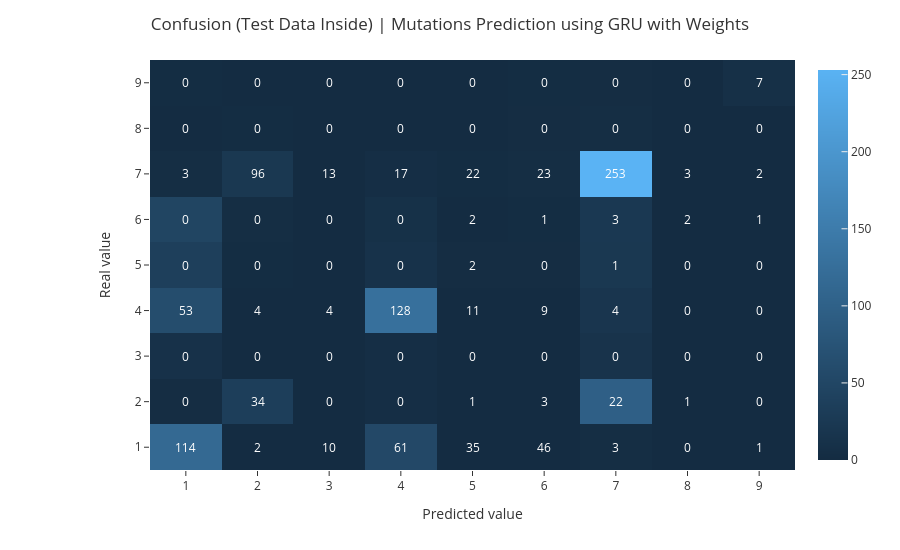

In [41]:
Y_pred_weights =np.argmax(mutations_gru_weight.predict(padded_test), axis=-1)
#y_pred_ohe_hot_encoded =model_bi_lstm.predict(padded_test > 0.5).astype("int32")

print("Métricas em Teste with Weights by Classes:\n ", classification_report(y_test,Y_pred_weights))
print('='*110)

# chamada da function
plot_confusion_matrix(confusion_matrix(y_test, Y_pred_weights),train['class'].unique(),'Confusion (Test Data Inside) | Mutations Prediction using GRU with Weights')

### Inicializando o tensorBoard

In [47]:
%load_ext tensorboard
%tensorboard --logdir=./mutations_logs --port=7007

### Evaluate o melhor modelo nos dados de teste.

### Aplicando text_to_sequences no Documento

In [42]:
#conversão de tokens de corpus de texto em uma sequência de inteiros 
seq_text = tokenizer.texts_to_sequences(test.new_text)

# Truncando e preenchendo as sequências de entrada para que todas tenham o mesmo comprimento para modelagem.

padded_testing = pad_sequences(seq_text, padding = 'post', maxlen=max_seq_len)
print('Shape of test tensor: ', padded_testing.shape)

Shape of test tensor:  (5668, 6)


### Predictions

Por fim, vamos efetuar as previsões dos dados de teste e submetê-las no site da competição no Kaggle.

In [43]:
# Model Evaaluation on Test Data
Y_pred =mutations_gru_weight.predict(padded_testing).round(2)
#y_pred_ohe_hot_encoded =model_bi_lstm.predict(padded_test > 0.5).astype("int32")

Y_pred

array([[0.  , 0.07, 0.08, ..., 0.25, 0.  , 0.  ],
       [0.  , 0.07, 0.08, ..., 0.25, 0.  , 0.  ],
       [0.  , 0.07, 0.08, ..., 0.25, 0.  , 0.  ],
       ...,
       [0.  , 0.07, 0.08, ..., 0.25, 0.  , 0.  ],
       [0.  , 0.07, 0.08, ..., 0.25, 0.  , 0.  ],
       [0.  , 0.07, 0.08, ..., 0.25, 0.  , 0.  ]], dtype=float32)

In [44]:
predicted_class  = np.array(tf.argmax(Y_pred, axis= 1))
test['predicted_class'] = predicted_class
#onehot = pd.get_dummies(full_test['predicted_class'])
#full_test = full_test.join(onehot)
test.head(10)

,id,gene,variation,new_text,predicted_class
0,0,ACSL4,R570S,acsl4 r570s,4
1,1,NAGLU,P521L,naglu p521l,4
2,2,PAH,L333F,pah l333f,4
3,3,ING1,A148D,ing1 a148d,4
4,4,TMEM216,G77A,tmem216 g77a,4
5,5,CD40LG,A123E,cd40lg a123e,4
6,6,KLF11,T220M,klf11 t220m,4
7,7,SGCB,T151R,sgcb t151r,4
8,8,CLCF1,R197L,clcf1 r197l,4
9,9,SDHAF1,R55P,sdhaf1 r55p,4


### Preparando os dados de envio

In [45]:
submit_weights = pd.DataFrame(Y_pred, columns=[f'class{i}' for i in range(0,10)])
# excluir class0, pois ela serve para preenchimento
submit_weights.drop(['class0'],axis =1, inplace= True)
submit_weights.insert(loc=0, column='id', value=test.id)
submit_weights.head(10)

,id,class1,class2,class3,class4,class5,class6,class7,class8,class9
0,0,0.07,0.08,0.03,0.37,0.15,0.05,0.25,0.0,0.0
1,1,0.07,0.08,0.03,0.37,0.15,0.05,0.25,0.0,0.0
2,2,0.07,0.08,0.03,0.37,0.15,0.05,0.25,0.0,0.0
3,3,0.07,0.08,0.03,0.37,0.15,0.05,0.25,0.0,0.0
4,4,0.07,0.08,0.03,0.37,0.15,0.05,0.25,0.0,0.0
5,5,0.07,0.08,0.03,0.37,0.15,0.05,0.25,0.0,0.0
6,6,0.07,0.08,0.03,0.37,0.15,0.05,0.25,0.0,0.0
7,7,0.07,0.08,0.03,0.37,0.15,0.05,0.25,0.0,0.0
8,8,0.07,0.08,0.03,0.37,0.15,0.05,0.25,0.0,0.0
9,9,0.07,0.08,0.03,0.37,0.15,0.05,0.25,0.0,0.0


In [46]:
# Arquivo de envio
submit_weights.to_csv('submission_file_predict/submission_gru_weight_by_classes.csv', index=False) 